In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Merge features with labeled difficulties 

In [11]:
experiments_df = pd.read_csv("pilot_experiments.csv")
experiments_df

,Clue ID,Source (Video),Participant ID,Date,Game #,Round #,Clue start timestamp,Clue end timestamp,Clue Difficulty
0,1,game1.1.mov,1,9/2/2026,1,1,0:00,0:37,2
1,2,game1.1.mov,1,9/2/2026,1,1,1:50,2:23,4
2,3,game1.1.mov,1,9/2/2026,1,1,3:40,4:00,3
3,4,game1.1.mov,1,9/2/2026,1,1,5:18,5:27,1
4,5,game1.2.mov,1,9/2/2026,1,2,1:04,1:22,2
5,6,game1.2.mov,1,9/2/2026,1,2,2:20,2:50,3
6,7,game1.2.mov,1,9/2/2026,1,2,4:10,4:30,4
7,8,game1.2.mov,1,9/2/2026,1,2,5:24,5:40,3
8,9,game1.2.mov,1,9/2/2026,1,3,12:19,12:49,2
9,10,game1.2.mov,1,9/2/2026,1,3,13:28,14:02,4


In [12]:
features_df = pd.read_csv("audio_features.csv")
features_df

,audio_file,clue id,clue_latency_sec,pause_durations_sec,longest_pause_sec,total_pause_time_sec,total_duration_sec,speaking_time_sec,words_per_second,verbal_hesitation_count,disfluency_count
0,clue_13.wav,13,32.12,1.091;0.511;0.430;1.010;0.383;0.430;0.313;0.34...,1.648617,24.392562,50.0,25.607438,0.240096,0.000,0.999638
1,clue_12.wav,12,19.94,0.859;0.348;0.778;0.383;1.335;0.592;0.639;0.30...,1.335147,8.092154,24.0,15.907846,0.586643,0.125,0.999592
2,clue_10.wav,10,24.90,0.302;0.383;0.406;0.383;0.302;0.337;0.441;0.33...,0.731429,5.700499,34.0,28.299501,0.246914,0.000,0.616725
3,clue_11.wav,11,21.78,0.325;0.337;0.453;0.348,0.452789,1.462857,29.0,27.537143,0.284900,0.125,0.999646
4,clue_15.wav,15,30.00,0.360;1.161;0.813;0.697;0.998;0.766;0.313;0.62...,1.160998,12.643265,36.0,23.356735,0.166223,0.625,0.999651
5,clue_14.wav,14,0.80,0.360,0.359909,0.359909,8.0,7.640091,0.547945,0.000,0.999647
6,clue_9.wav,9,18.32,16.324;0.360;0.430;0.871;0.940;1.451;2.183,16.323628,22.558186,30.0,7.441814,0.639932,0.500,0.998876
7,clue_8.wav,8,0.00,0.383;0.360;0.372;0.546;0.313;0.453,0.545669,2.426485,16.0,13.573515,0.657895,0.000,0.800160
8,clue_1.wav,1,0.00,0.302;0.580;0.302;0.650;0.476;0.592;0.372;0.464,0.650159,3.738413,37.0,33.261587,0.428571,0.125,0.992990
9,clue_3.wav,3,0.00,NaN,0.000000,0.000000,20.0,20.000000,0.488599,0.000,0.999506


In [15]:
# Merge on Clue ID (left join keeps all experiment rows)
merged_df = experiments_df.merge(features_df, left_on="Clue ID", right_on="clue id", how="left")

# Drop duplicate clue_id column
df = merged_df.drop(columns=["clue id", "Source (Video)", "Participant ID", "Date", "Game #", "Round #", "Clue start timestamp", "Clue end timestamp", "audio_file"])

In [20]:
def parse_pause_list(x):
    if pd.isna(x):  # handle NaN
        return []
    # Convert everything to string, then split
    return [float(i) for i in str(x).split(";")]

# Convert to list of floats
df["pause_list"] = df["pause_durations_sec"].apply(parse_pause_list)
df["pause_count"] = df["pause_list"].apply(len)
df["pause_total"] = df["pause_list"].apply(sum)
df = df.drop(columns=["pause_list", "pause_durations_sec"])

In [21]:
df

,Clue ID,Clue Difficulty,clue_latency_sec,longest_pause_sec,total_pause_time_sec,total_duration_sec,speaking_time_sec,words_per_second,verbal_hesitation_count,disfluency_count,pause_count,pause_total
0,1,2,0.00,0.650159,3.738413,37.0,33.261587,0.428571,0.125,0.992990,8,3.738
1,2,4,29.98,0.673379,5.839819,33.0,27.160181,1.682692,0.000,0.930014,15,5.840
2,3,3,0.00,0.000000,0.000000,20.0,20.000000,0.488599,0.000,0.999506,0,0.000
3,4,1,0.00,0.000000,0.000000,9.0,9.000000,0.837989,0.250,0.833150,0,0.000
4,5,2,0.00,4.237642,11.180408,18.0,6.819592,0.286041,0.000,0.809277,6,11.181
5,6,3,18.68,4.794921,21.745488,30.0,8.254512,0.572519,0.375,0.811465,13,21.745
6,7,4,10.36,3.541043,14.024853,20.0,5.975147,0.305998,0.000,0.811873,7,14.025
7,8,3,0.00,0.545669,2.426485,16.0,13.573515,0.657895,0.000,0.800160,6,2.427
8,9,2,18.32,16.323628,22.558186,30.0,7.441814,0.639932,0.500,0.998876,7,22.559
9,10,4,24.90,0.731429,5.700499,34.0,28.299501,0.246914,0.000,0.616725,15,5.700


In [22]:
df.columns

Index(['Clue ID', 'Clue Difficulty', 'clue_latency_sec', 'longest_pause_sec',
       'total_pause_time_sec', 'total_duration_sec', 'speaking_time_sec',
       'words_per_second', 'verbal_hesitation_count', 'disfluency_count',
       'pause_count', 'pause_total'],
      dtype='str')

## 2. Visualize Insights per Clue Difficulty

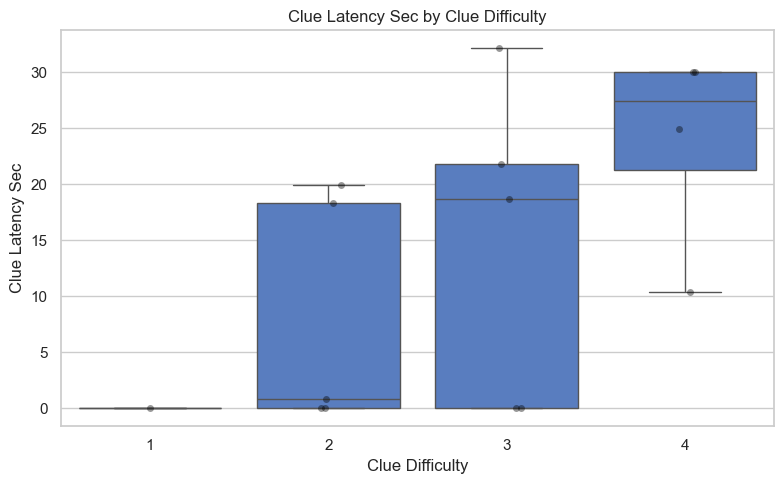

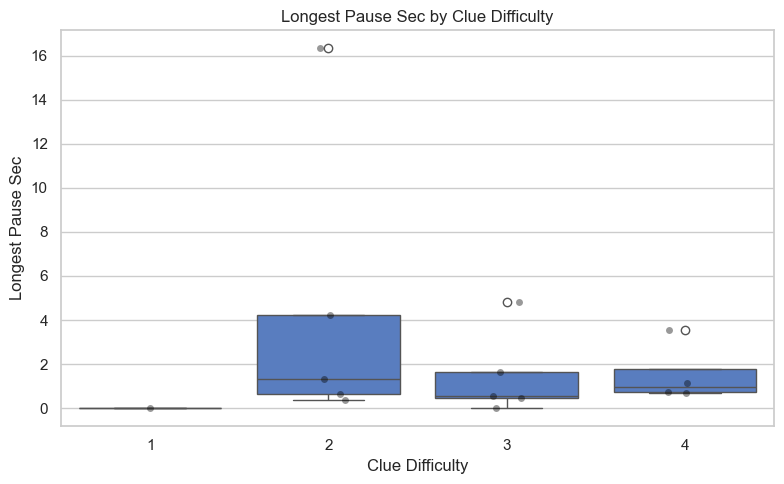

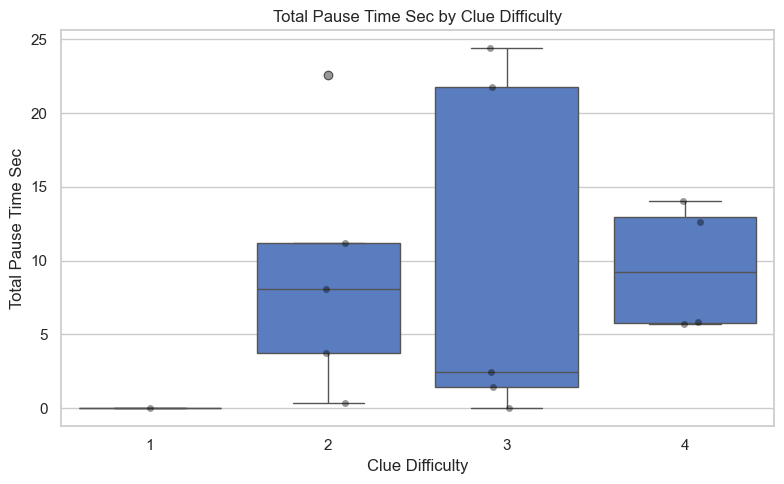

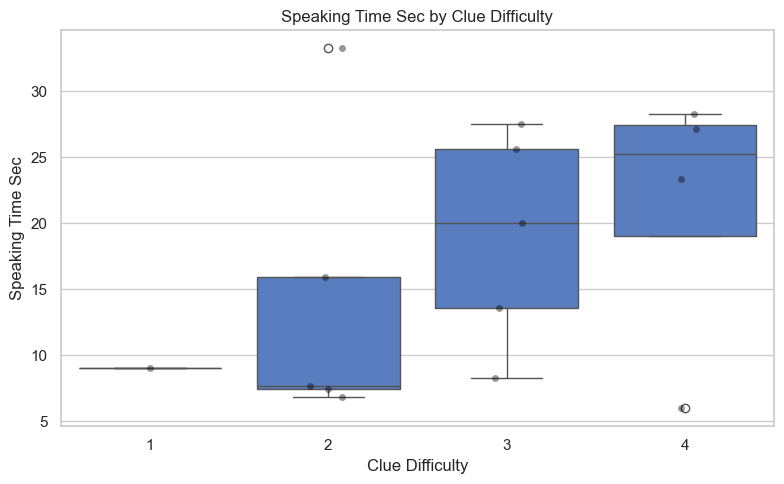

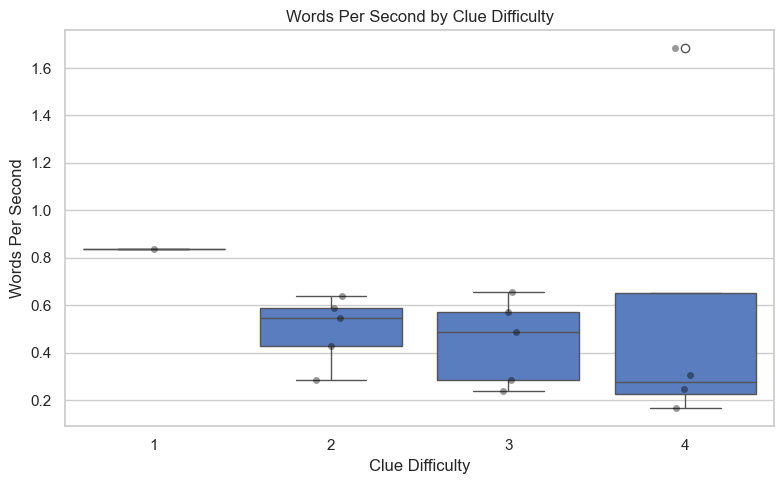

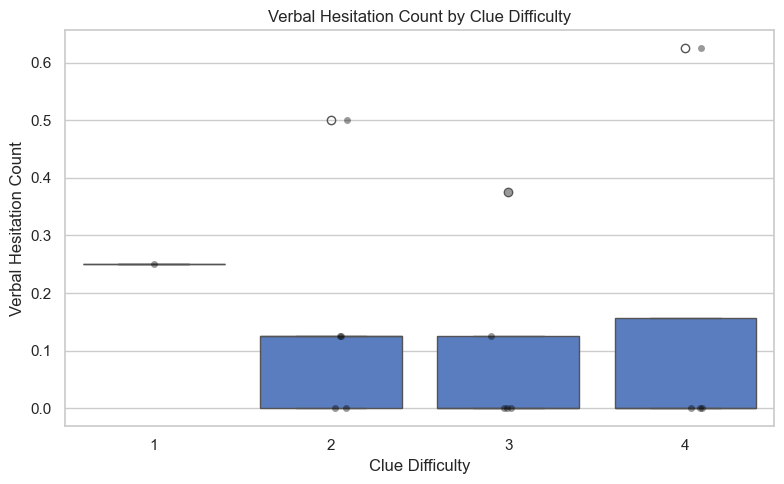

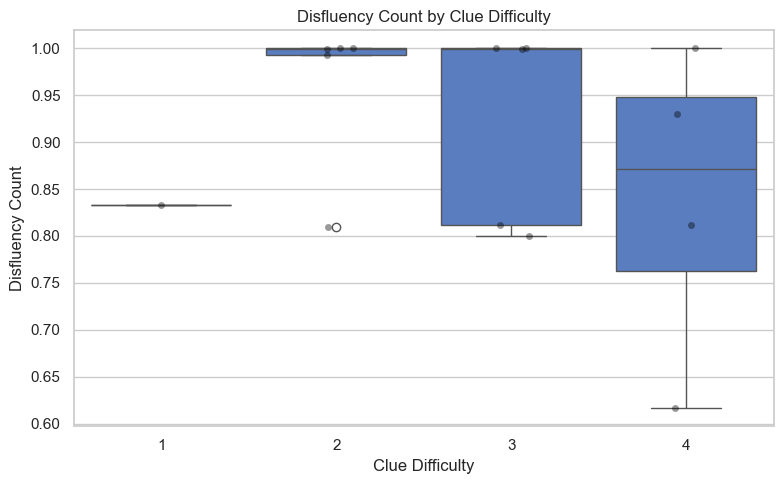

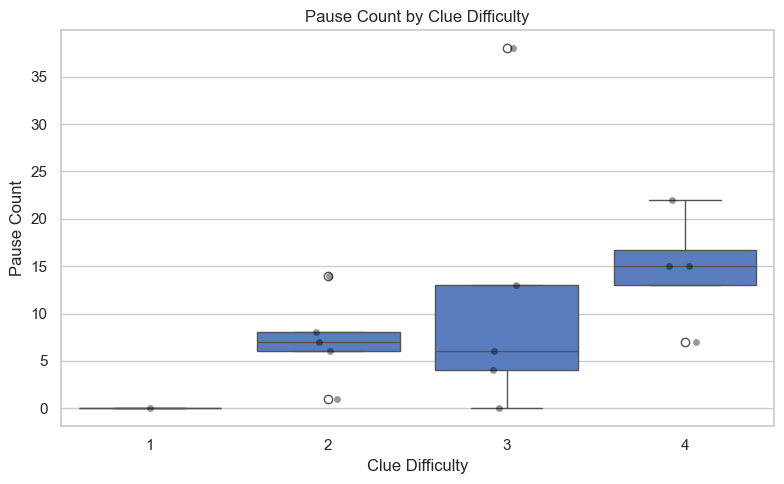

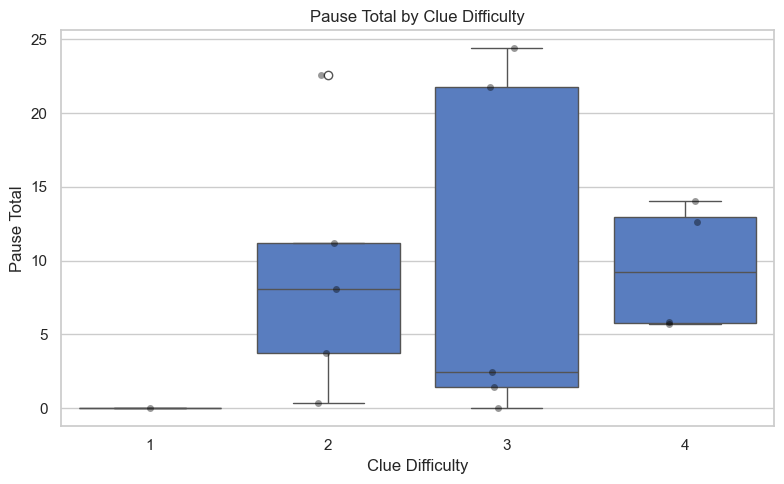

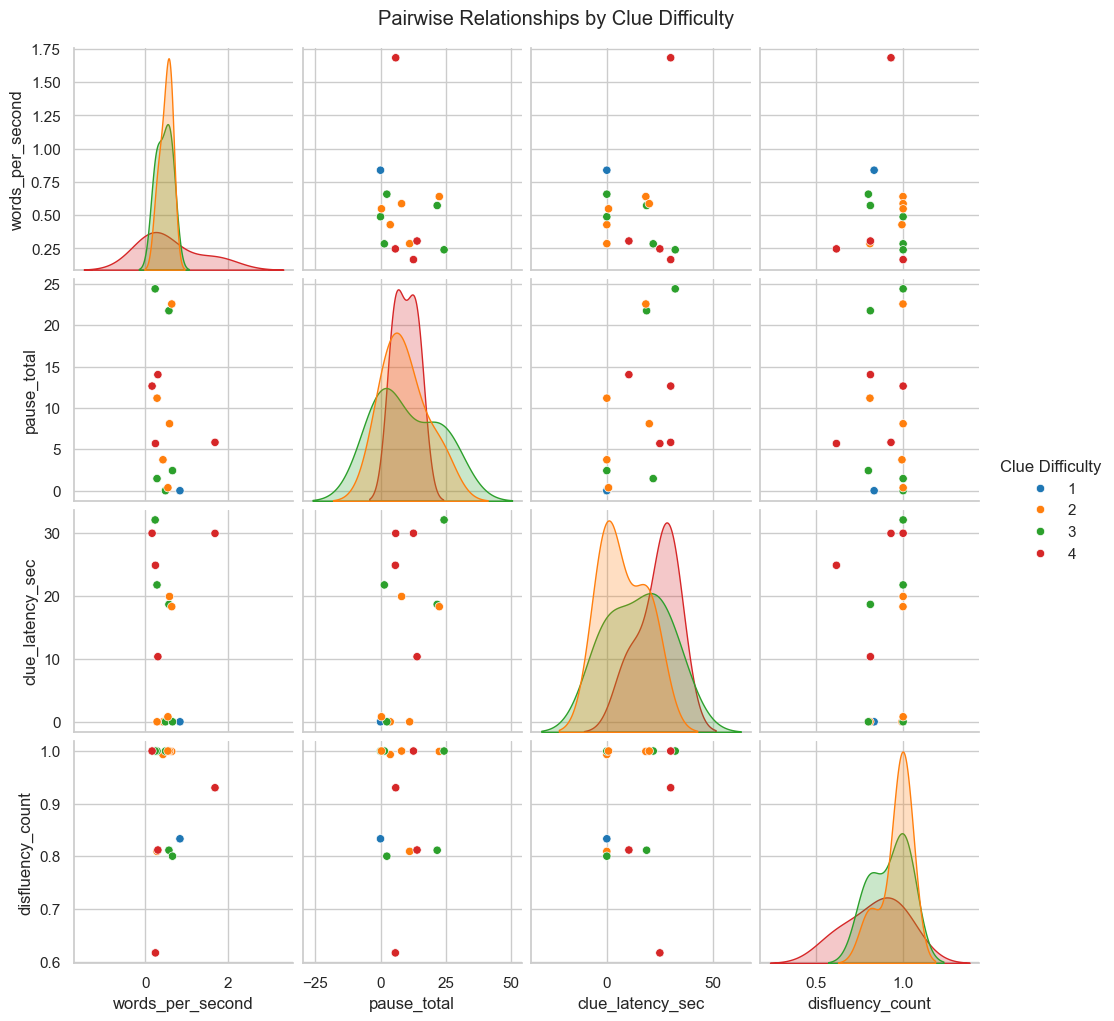

In [28]:
# Ensure numeric
df['Clue Difficulty'] = pd.to_numeric(df['Clue Difficulty'], errors='coerce')

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# List of features to visualize
features = [
    'clue_latency_sec',
    'longest_pause_sec',
    'total_pause_time_sec',
    'speaking_time_sec',
    'words_per_second',
    'verbal_hesitation_count',
    'disfluency_count',
    'pause_count',
    'pause_total'
]

# Create boxplots for each feature by difficulty
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Clue Difficulty', y=feature, data=df)
    sns.stripplot(x='Clue Difficulty', y=feature, data=df, color='black', alpha=0.4, jitter=True)
    plt.title(f'{feature.replace("_", " ").title()} by Clue Difficulty')
    plt.xlabel('Clue Difficulty')
    plt.ylabel(feature.replace("_", " ").title())
    plt.tight_layout()
    plt.show()

# Optional: pairwise scatter plot to see relationships
pair_features = ['words_per_second', 'pause_total', 'clue_latency_sec', 'disfluency_count']
sns.pairplot(df, vars=pair_features, hue='Clue Difficulty', palette='tab10', diag_kind='kde')
plt.suptitle("Pairwise Relationships by Clue Difficulty", y=1.02)
plt.show()
